In [1]:
import pandas as pd
import numpy as np


In [ ]:
spam = pd.read_csv("spam.csv", encoding="ISO-8859-1")

In [3]:
spam

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
spam = spam.drop(columns=["Unnamed: 2",	"Unnamed: 3",	"Unnamed: 4"])

In [5]:
spam.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)

In [6]:
spam

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [9]:
spam['target'] = encoder.fit_transform(spam['target'])

In [10]:
spam

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [11]:
spam.isnull().sum()

target    0
text      0
dtype: int64

In [12]:
spam.duplicated().sum()

403

In [13]:
spam = spam.drop_duplicates()

## EDA

In [14]:
spam['target'].value_counts() # Unbalanced data

target
0    4516
1     653
Name: count, dtype: int64

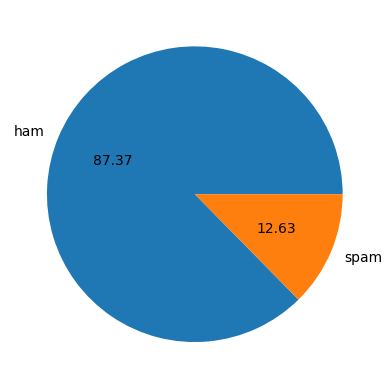

In [15]:
import matplotlib.pyplot as plt

plt.pie(spam['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [16]:
from wordcloud import WordCloud
wc = WordCloud(background_color="white")


In [17]:
spam_wc = wc.generate(spam[spam['target']==1]['text'].str.cat(sep=' '))


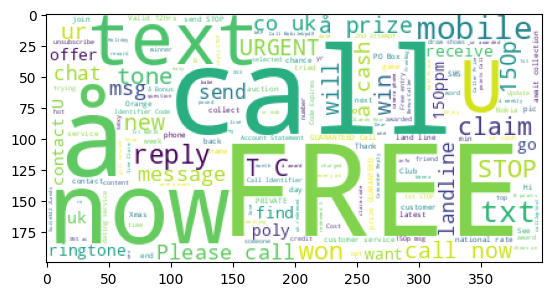

In [18]:
plt.imshow(spam_wc)


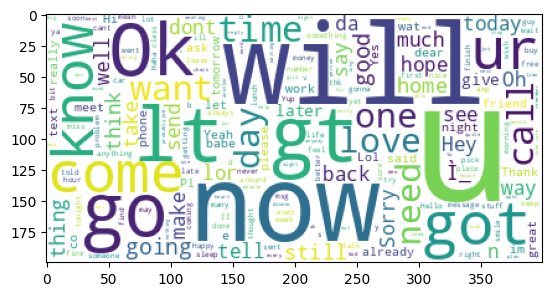

In [19]:
ham_wc = wc.generate(spam[spam["target"] == 0]["text"].str.cat(sep=" "))
plt.imshow(ham_wc)

In [20]:
spam[spam["target"] == 1]["text"].tolist()

["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv",
 'WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.',
 'Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030',
 'SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info',
 'URGENT! You have won a 1 week FREE membership in our å£100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18',
 'XXXMobileMovieClub: To use your credit, click the WAP link in

In [21]:
spam_list= []
for words in spam[spam['target']==1]['text'].tolist():
    for w in words.split(" "):
        spam_list.append(w)
ham_list = []
for word in spam[spam['target']==0]['text'].tolist():
    for w in word.split(" "):
        ham_list.append(w)
len(spam_list), len(ham_list)


(15495, 64397)

In [22]:
spam_list

['Free',
 'entry',
 'in',
 '2',
 'a',
 'wkly',
 'comp',
 'to',
 'win',
 'FA',
 'Cup',
 'final',
 'tkts',
 '21st',
 'May',
 '2005.',
 'Text',
 'FA',
 'to',
 '87121',
 'to',
 'receive',
 'entry',
 'question(std',
 'txt',
 "rate)T&C's",
 'apply',
 "08452810075over18's",
 'FreeMsg',
 'Hey',
 'there',
 'darling',
 "it's",
 'been',
 '3',
 "week's",
 'now',
 'and',
 'no',
 'word',
 'back!',
 "I'd",
 'like',
 'some',
 'fun',
 'you',
 'up',
 'for',
 'it',
 'still?',
 'Tb',
 'ok!',
 'XxX',
 'std',
 'chgs',
 'to',
 'send,',
 'å£1.50',
 'to',
 'rcv',
 'WINNER!!',
 'As',
 'a',
 'valued',
 'network',
 'customer',
 'you',
 'have',
 'been',
 'selected',
 'to',
 'receivea',
 'å£900',
 'prize',
 'reward!',
 'To',
 'claim',
 'call',
 '09061701461.',
 'Claim',
 'code',
 'KL341.',
 'Valid',
 '12',
 'hours',
 'only.',
 'Had',
 'your',
 'mobile',
 '11',
 'months',
 'or',
 'more?',
 'U',
 'R',
 'entitled',
 'to',
 'Update',
 'to',
 'the',
 'latest',
 'colour',
 'mobiles',
 'with',
 'camera',
 'for',
 'Free!',

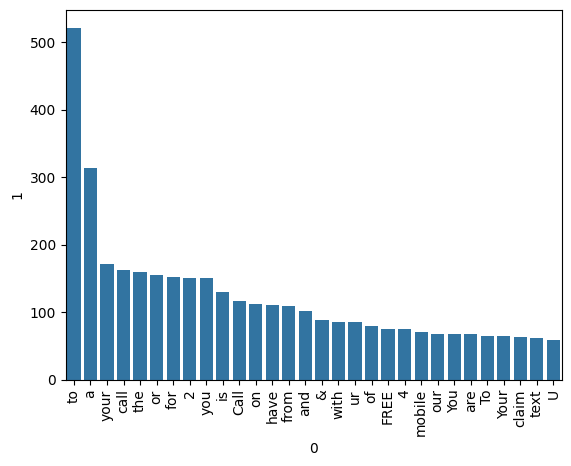

In [23]:
from collections import Counter
import seaborn as sns
sns.barplot(
    x=pd.DataFrame(Counter(spam_list).most_common(30))[0],
    y=pd.DataFrame(Counter(spam_list).most_common(30))[1],
)
plt.xticks(rotation="vertical")
plt.show()

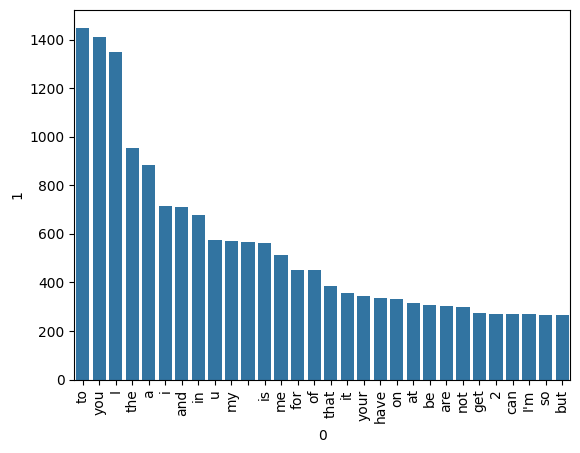

In [24]:
from collections import Counter
import seaborn as sns

sns.barplot(
    x=pd.DataFrame(Counter(ham_list).most_common(30))[0],
    y=pd.DataFrame(Counter(ham_list).most_common(30))[1],
)
plt.xticks(rotation="vertical")
plt.show()

## Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [25]:
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import string
ps = PorterStemmer()


In [26]:
def pre_processing(text):
    text = text.lower()
    text=nltk.word_tokenize(text)
    processed = []
    for t in text:
        if t.isalnum() and t not in stopwords.words("english") and t not in string.punctuation:
            processed.append(ps.stem(t))
    return " ".join(processed)


In [27]:
pre_processing("Hi!! how are you? Can we go out tonight or for running tomorrow morning?")

'hi go tonight run tomorrow morn'

In [28]:
spam['processed_text'] = spam['text'].apply(pre_processing)

C:\Users\krish\AppData\Local\Temp\ipykernel_23256\919853015.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spam['processed_text'] = spam['text'].apply(pre_processing)


In [29]:
spam

,target,text,processed_text
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,guy bitch act like interest buy someth els nex...


## Model Building

In [30]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000) 

In [31]:
X = (cv.fit_transform(spam['processed_text'])).toarray()
X=(tfidf.fit_transform(spam['processed_text'])).toarray()


In [32]:
X.shape    

(5169, 3000)

In [33]:
Y=spam['target'].values

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [36]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [37]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [38]:
gnb.fit(X_train, Y_train)
Y_pred = gnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred))
print(confusion_matrix(Y_test, Y_pred))
print(precision_score(Y_test, Y_pred))

0.8824439288476411
[[1005  121]
 [  31  136]]
0.5291828793774319


In [39]:
mnb.fit(X_train, Y_train)
Y_pred = mnb.predict(X_test)
print(accuracy_score(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))
print(precision_score(Y_test, Y_pred))

0.9690641918020109
[[1126    0]
 [  40  127]]
1.0


In [40]:
bnb.fit(X_train, Y_train)
Y_pred = bnb.predict(X_test)
print(accuracy_score(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))
print(precision_score(Y_test, Y_pred))

0.9721577726218097
[[1121    5]
 [  31  136]]
0.9645390070921985


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [42]:
svc = SVC(kernel="sigmoid", gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver="liblinear", penalty="l1")
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [43]:
clfs = {
    "SVC": svc,
    "KN": knc,
    "NB": mnb,
    "DT": dtc,
    "LR": lrc,
    "RF": rfc,
    "AdaBoost": abc,
    "BgC": bc,
    "ETC": etc,
    "GBDT": gbdt,
    "xgb": xgb,
}

In [44]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    return accuracy, precision

In [46]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():

    current_accuracy, current_precision = train_classifier(
        clf, X_train, Y_train, X_test, Y_test
    )

    print("For ", name)
    print("Accuracy - ", current_accuracy)
    print("Precision - ", current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9698375870069605
Precision -  0.9776119402985075
For  KN
Accuracy -  0.9149265274555298
Precision -  1.0
For  NB
Accuracy -  0.9690641918020109
Precision -  1.0
For  DT
Accuracy -  0.9296210363495746
Precision -  0.8166666666666667
For  LR
Accuracy -  0.951276102088167
Precision -  0.9482758620689655
For  RF
Accuracy -  0.9667440061871616
Precision -  0.9696969696969697


c:\Users\krish\miniconda3\envs\nlp\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9574632637277649
Precision -  0.8943661971830986
For  BgC
Accuracy -  0.9535962877030162
Precision -  0.8407643312101911
For  ETC
Accuracy -  0.9706109822119103
Precision -  0.9640287769784173
For  GBDT
Accuracy -  0.9481825212683681
Precision -  0.9166666666666666
For  xgb
Accuracy -  0.9644238205723125
Precision -  0.9115646258503401


In [49]:
performance_df = pd.DataFrame(
    {
        "Algorithm": clfs.keys(),
        "Accuracy": accuracy_scores,
        "Precision": precision_scores,
    }
).sort_values("Precision", ascending=False)

In [50]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.914927,1.000000
2,NB,0.969064,1.000000
0,SVC,0.969838,0.977612
5,RF,0.966744,0.969697
8,ETC,0.970611,0.964029
4,LR,0.951276,0.948276
9,GBDT,0.948183,0.916667
10,xgb,0.964424,0.911565
6,AdaBoost,0.957463,0.894366
7,BgC,0.953596,0.840764


In [59]:
# voting classifier
svc = SVC(kernel="sigmoid", gamma=1.0, probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [60]:
voting = VotingClassifier(
    estimators=[("svm", svc), ("nb", mnb), ("et", etc)], voting="soft"
)

In [61]:
voting.fit(X_train, Y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [62]:
Y_pred= voting.predict(X_test)
print(accuracy_score(Y_pred, Y_test))
print(precision_score(Y_pred, Y_test))

0.9760247486465584
0.8263473053892215


In [63]:
estimators = [("svm", svc), ("nb", mnb), ("et", etc)]
final_estimator = RandomForestClassifier()
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
print("Accuracy", accuracy_score(Y_test, y_pred))
print("Precision", precision_score(Y_test, y_pred))

Accuracy 0.9822119102861562
Precision 0.9736842105263158


In [65]:
mnb.fit(X_train, Y_train)
Y_pred=mnb.predict(X_test)
print(accuracy_score(Y_pred, Y_test))
print(precision_score(Y_test, Y_pred))

0.9690641918020109
1.0


In [66]:
import pickle

pickle.dump(tfidf, open("vectorizer.pkl", "wb"))
pickle.dump(mnb, open("model.pkl", "wb"))